In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import os
import re
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
import csv

def clean_csv(input_file, output_file):
    with open(input_file, 'r', encoding='utf-8') as infile, open(output_file, 'w', newline='', encoding='utf-8') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)

        for row in reader:
            # Attempt to clean up rows by removing unexpected line breaks within cells and ensuring proper quoting
            cleaned_row = [cell.replace('\n', ' ').strip() for cell in row]
            writer.writerow(cleaned_row)

clean_csv('/content/drive/MyDrive/CS521_Project/wikihowAll.csv', '/content/drive/MyDrive/CS521_Project/cleaned_wikihowAll.csv')


In [5]:
import pandas as pd

# Ensure the file path points to your cleaned or modified CSV file
file_path = '/content/drive/MyDrive/CS521_Project/cleaned_wikihowAll.csv'

try:
    # Read data from the CSV file
    Data = pd.read_csv(file_path)

    # Convert all data to string type
    Data = Data.astype(str)

    # Get the dimensions of the DataFrame
    rows, columns = Data.shape

    # Print the number of rows and columns to verify the size of your data
    print("Data loaded successfully!")
    print("Rows:", rows, "Columns:", columns)

except Exception as e:
    print("Failed to read the file:", e)


Data loaded successfully!
Rows: 215365 Columns: 3


In [6]:
# Display the first few rows of the DataFrame
print(Data.head())

# Display a summary of the DataFrame
print(Data.info())

# Check for any missing values in each column
print(Data.isnull().sum())


                                            headline  \
0  Keep related supplies in the same area., Make ...   
1  Create a sketch in the NeoPopRealist manner of...   
2  Get a bachelor’s degree., Enroll in a studio-b...   
3  Start with some experience or interest in art....   
4  Keep your reference materials, sketches, artic...   

                                    title  \
0          How to Be an Organized Artist1   
1  How to Create a Neopoprealist Art Work   
2      How to Be a Visual Effects Artist1   
3           How to Become an Art Investor   
4          How to Be an Organized Artist2   

                                                text  
0  If you're a photographer, keep all the necessa...  
1  See the image for how this drawing develops st...  
2  It is possible to become a VFX artist without ...  
3  The best art investors do their research on th...  
4  As you start planning for a project or work, y...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215365 entri

In [7]:
# Filtering rows where 'text' and 'headline' columns are not null
df = Data[(Data['text'].notna()) & (Data['headline'].notna())]

# Removing rows where the 'text' column has 'nan' as its value
df = df[df['text'] != 'nan']

# Dropping duplicate entries based on the 'text' column
df = df.drop_duplicates(subset='text', inplace=False)


In [8]:
df

,headline,title,text
0,"Keep related supplies in the same area., Make ...",How to Be an Organized Artist1,"If you're a photographer, keep all the necessa..."
1,Create a sketch in the NeoPopRealist manner of...,How to Create a Neopoprealist Art Work,See the image for how this drawing develops st...
2,"Get a bachelor’s degree., Enroll in a studio-b...",How to Be a Visual Effects Artist1,It is possible to become a VFX artist without ...
3,Start with some experience or interest in art....,How to Become an Art Investor,The best art investors do their research on th...
4,"Keep your reference materials, sketches, artic...",How to Be an Organized Artist2,"As you start planning for a project or work, y..."
...,...,...,...
215360,"Consider changing the spelling of your name., ...",How to Pick a Stage Name3,"If you have a name that you like, you might fi..."
215361,"Try out your name., Don’t legally change your ...",How to Pick a Stage Name4,Your name might sound great to you when you sa...
215362,"Understand the process of relief printing., Ex...",How to Identify Prints1,Relief printing is the oldest and most traditi...
215363,"Understand the process of intaglio printing., ...",How to Identify Prints2,"Intaglio is Italian for ""incis­ing,"" and corre..."


In [9]:
# Set of stopwords
english_stopwords = set(stopwords.words('english'))

def clean_text_input(input_text, mode):
    modified_text = input_text.lower()
    modified_text = BeautifulSoup(modified_text, "lxml").get_text()
    modified_text = re.sub(r'\([^)]*\)', '', modified_text)
    modified_text = modified_text.replace('"', '')
    modified_text = ' '.join([contraction_mapping.get(word, word) for word in modified_text.split()])
    modified_text = re.sub(r"'s\b", "", modified_text)
    modified_text = re.sub("[^a-zA-Z]", " ", modified_text)
    modified_text = re.sub('[m]{2,}', 'mm', modified_text)

    if mode == 0:
        modified_text = re.sub(r'\.', ' . ', modified_text)
        words_list = [word for word in modified_text.split() if word not in english_stopwords]
    else:
        words_list = modified_text.split()

    # Filter out single-character words
    longer_words = [word for word in words_list if len(word) > 1]
    return " ".join(longer_words).strip()


In [10]:
# Flat contraction mapping
contraction_mapping = {
    "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have",
    "I'm": "I am", "I've": "I have",
    "you'd": "you would", "you'd've": "you would have", "you'll": "you will",
    "you'll've": "you will have", "you're": "you are", "you've": "you have",
    "he'd": "he would", "he'll": "he will", "he's": "he is",
    "she'd": "she would", "she'd've": "she would have", "she'll": "she will",
    "she'll've": "she will have", "she's": "she is",
    "it'd": "it would", "it'd've": "it would have", "it'll": "it will",
    "it'll've": "it will have", "it's": "it is",
    "we'd": "we would", "we'd've": "we would have", "we'll": "we will",
    "we'll've": "we will have", "we're": "we are", "we've": "we have",
    "they'd": "they would", "they'd've": "they would have", "they'll": "they will",
    "they'll've": "they will have", "they're": "they are", "they've": "they have",
    "aren't": "are not", "can't": "cannot", "couldn't": "could not", "didn't": "did not",
    "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not",
    "haven't": "have not", "isn't": "is not", "mustn't": "must not", "shan't": "shall not",
    "shouldn't": "should not", "wasn't": "was not", "weren't": "were not", "won't": "will not",
    "wouldn't": "would not", "'cause": "because", "o'clock": "of the clock", "ma'am": "madam", "let's": "let us"
}


In [11]:
cleaned_texts_list = []
for t in df['text']:
    cleaned_texts_list.append(clean_text_input(t, 0))

In [12]:
#call the function
clean_summary = []
for t in df['headline']:
    clean_summary.append(clean_text_input(t,0))

In [13]:
df['text']=cleaned_texts_list
df['headline']=clean_summary

df.replace('', np.nan, inplace=True)
df.dropna(axis=0,inplace=True)

Analyzing the sequence distribution

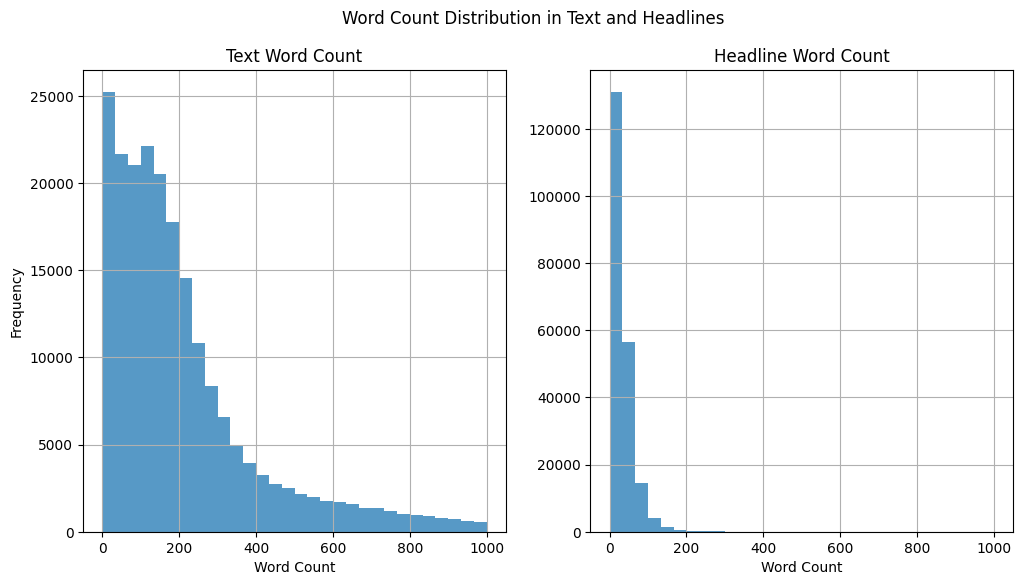

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame 'df' and list calculations are correct
text_word_count = [len(i.split()) for i in df['text']]
headline_word_count = [len(j.split()) for j in df['headline']]
length_df = pd.DataFrame({'text': text_word_count, 'headline': headline_word_count})

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
length_df['text'].hist(bins=30, range=[0, 1000], alpha=0.75, ax=axes[0])
length_df['headline'].hist(bins=30, range=[0, 1000], alpha=0.75, ax=axes[1])

axes[0].set_title('Text Word Count')
axes[1].set_title('Headline Word Count')
axes[0].set_xlabel('Word Count')
axes[0].set_ylabel('Frequency')
axes[1].set_xlabel('Word Count')

plt.suptitle('Word Count Distribution in Text and Headlines')
plt.show()


In [15]:
# From the graph
# We can fix maximum length of text = 150 since most of the reviews have a length of 150 and maximum headline length of 50, since maximum headlines are of size 50

max_len_text= 150
max_len_headline=50

In [16]:
cnt=0
for i in df['text']:
    if(len(i.split())<=150):
        cnt=cnt+1
print(cnt/len(df['text']))

0.48348309491289865


Selecting text and headlines below the maximum lengths

In [17]:
text1 =np.array(df['text'])
headline1=np.array(df['headline'])

short_text=[]
short_summary=[]

for i in range(len(text1)):
    if(len(headline1[i].split())<=50 and len(text1[i].split())<=150):
        short_text.append(text1[i])
        short_summary.append(headline1[i])

df=pd.DataFrame({'text':short_text,'summary':short_summary})

In [18]:
# Validating the lengths

text1 =np.array(df['text'])
headline1=np.array(df['summary'])


for i in range(len(text1)):
    if(len(headline1[i].split())>=150):
      print(i)

In [19]:
print(df['text'][50],df['summary'][50],sep='\n')

guy like every facebook status update instagram picture post better yet frequently comment posts sign wants interact may indicate likes look see comments people posts well comments frequently may reveal avid social media user however rarely likes comments posts sign might feelings publicly comments one photos posts respond eager start conversation way may reveal likes least enjoys messaging example may say great photo could respond saying vancouver last week beautiful city guy met starts liking commenting old photos sig interested means spent time looking back old photos probably wants know better enjoys looking pictures guy likes want connect follow variety different social media platforms example may add facebook snapchat start following twitter instagram adding number social media sites likely sign wants look posts photos selfies attempt get know better
see interacts posts reply comments notice comments old pictures posts check see added multiple social media platforms


**Splitting data into train, test  --  70 - 30**

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['text'],df['summary'],test_size=0.3,random_state=0,shuffle=True)

In [25]:
print(len(x_train))
print(len(x_test))

59672
25574


Language Translation Model

In [26]:
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [27]:
SOS_token = 0
EOS_token = 1

class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.index2word = {SOS_token: "SOS", EOS_token: "EOS"}
        self.word2count = {}
        self.n_words = 2  # Initially include SOS and EOS

    def addSentence(self, sentence):
        words = sentence.split()
        for word in words:
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.index2word[self.n_words] = word
            self.word2count[word] = 1
            self.n_words += 1
        elif word in self.word2count:
            self.word2count[word] += 1


In [28]:
def readLangs(text, summary, reverse=False):
    print("Reading lines...")

    # Create arrays from text and summary
    text_data = np.array(text)
    summary_data = np.array(summary)

    # Formulate pairs of text and summary
    pairs = [[text_data[i], summary_data[i]] for i in range(len(text_data))]

    # Optionally reverse pairs and adjust Lang instances accordingly
    if reverse:
        pairs = [pair[::-1] for pair in pairs]  # Reverse each pair
        input_lang = Lang(summary)
        output_lang = Lang(text)
    else:
        input_lang = Lang(text)
        output_lang = Lang(summary)

    return input_lang, output_lang, pairs


In [29]:
def prepareData(lang1, lang2, reverse=False):
    input_lang, output_lang, pairs = readLangs(lang1, lang2, reverse)
    total_pairs = len(pairs)
    print(f"Read {total_pairs} sentence pairs")
    print("Counting words...")

    for pair in pairs:
        input_text, output_text = pair[0], pair[1]
        input_lang.addSentence(input_text)
        output_lang.addSentence(output_text)

    print("Counted words:")
    print(f"{input_lang.name}: {input_lang.n_words} words")
    print(f"{output_lang.name}: {output_lang.n_words} words")

    return input_lang, output_lang, pairs


In [30]:
input_lang, output_lang, pairs = prepareData(x_train, y_train , False)
print(random.choice(pairs))

Reading lines...
Read 59672 sentence pairs
Counting words...
Counted words:
26413    mental health professional trained adhd issues...
5438     many reasons get certified cpr important ones ...
63178    best flavor want brisket known packer cut bris...
52708    cooked remove heat drain fat set aside using s...
42015    locate app ios device tap app logo picture mee...
                               ...                        
21243    xbox costs roughly accessories playstation cos...
45891    drugs good reducing pain stiffness psoriatic a...
42613    method help copy photos another ios device iph...
43567    use link type url web browser sure include dat...
68268    pour equal amounts vinegar salt lemon juice mi...
Name: text, Length: 59672, dtype: object: 60012 words
26413    schedule appointment mental health professiona...
5438     identify reasons get certified prepare questio...
63178    select beef brisket trim brisket mix seasoning...
52708    brown beef large skillet whisk flou

Deep Model

In [31]:
def indexesFromSentence(lang, sentence):
    words = sentence.split(' ')
    return [lang.word2index[word] for word in words]

def tensorFromSentence(lang, sentence):
    sentence_indexes = indexesFromSentence(lang, sentence)
    sentence_indexes += [EOS_token]  # Append EOS token directly
    return torch.tensor(sentence_indexes, dtype=torch.long, device=device).view(-1, 1)

def tensorsFromPair(pair):
    input_text, target_text = pair  # Unpacking pair for clarity
    input_tensor = tensorFromSentence(input_lang, input_text)
    target_tensor = tensorFromSentence(output_lang, target_text)
    return input_tensor, target_tensor


In [33]:
from __future__ import division, print_function, unicode_literals
from io import open
import random
import re
import string
import unicodedata

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

# Determine if CUDA is available, and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [89]:
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output = embedded
        output, hidden = self.gru(output, hidden)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [90]:
class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size):
        super().__init__()  # Simplified super() call
        self.hidden_size = hidden_size

        # Layer definitions
        self.embedding_layer = nn.Embedding(num_embeddings=output_size, embedding_dim=hidden_size)
        self.gru_layer = nn.GRU(input_size=hidden_size, hidden_size=hidden_size)
        self.output_layer = nn.Linear(in_features=hidden_size, out_features=output_size)
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, input_tensor, hidden_state):
        # Embedding and activation
        embedded = self.embedding_layer(input_tensor).view(1, 1, -1)
        activated_output = F.relu(embedded)
        # GRU processing
        output, hidden_state = self.gru_layer(activated_output, hidden_state)
        # Output processing
        output = self.log_softmax(self.output_layer(output[0]))
        return output, hidden_state

    def initHidden(self):
        # Initializes and returns a new hidden state
        return torch.zeros(1, 1, self.hidden_size, device=device)


In [36]:
MAX_LENGTH = 150

In [64]:
class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=MAX_LENGTH):
        super().__init__()  # Simplified call to super
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        # Layer definitions
        self.embedding_layer = nn.Embedding(num_embeddings=output_size, embedding_dim=hidden_size)
        self.attention_layer = nn.Linear(in_features=hidden_size * 2, out_features=max_length)
        self.combined_attention_layer = nn.Linear(in_features=hidden_size * 2, out_features=hidden_size)
        self.dropout_layer = nn.Dropout(dropout_p)
        self.gru_layer = nn.GRU(input_size=hidden_size, hidden_size=hidden_size)
        self.output_layer = nn.Linear(in_features=hidden_size, out_features=output_size)

    def forward(self, input_tensor, hidden_state, encoder_outputs):
        embedded = self.embedding_layer(input_tensor).view(1, 1, -1)
        attention_weights = F.softmax(
            self.attention_layer(torch.cat((embedded[0], hidden_state[0]), dim=1)), dim=1)

        # Ensure that encoder_outputs is prepared to match the size of attention_weights
        if encoder_outputs.size(0) > attention_weights.size(1):
            encoder_outputs = encoder_outputs[:attention_weights.size(1), :]

        # Now perform the batch matrix multiplication
        attention_applied = torch.bmm(attention_weights.unsqueeze(0),
                                      encoder_outputs.unsqueeze(0))

        output = torch.cat((embedded[0], attention_applied[0]), 1)
        output = self.combined_attention_layer(output).unsqueeze(0)
        output = F.relu(output)
        output, hidden_state = self.gru_layer(output, hidden_state)

        return output, hidden_state, attention_weights


    def initHidden(self):
        # Initialize hidden state with zeros
        return torch.zeros(1, 1, self.hidden_size, device=device)


In [65]:
def indexesFromSentence(lang, sentence):
    # Extract indexes from the sentence
    return [lang.word2index[word] for word in sentence.split(' ')]

def tensorFromSentence(lang, sentence):
    # Create a tensor from the indexes of the sentence with EOS token appended
    indexes = indexesFromSentence(lang, sentence)
    indexes += [EOS_token]  # Adding EOS token at the end of the sentence
    return torch.tensor(indexes, dtype=torch.long, device=device).reshape(-1, 1)

def tensorsFromPair(pair):
    # Generate input and target tensors from a pair of sentences
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    return input_tensor, target_tensor


In [66]:
import time
import math

def asMinutes(seconds):
    minutes = int(seconds // 60)
    seconds = int(seconds % 60)
    return f'{minutes}m {seconds}s'

def timeSince(start_time, progress):
    current_time = time.time()
    elapsed_time = current_time - start_time
    estimated_total_time = elapsed_time / progress
    remaining_time = estimated_total_time - elapsed_time
    return f'{asMinutes(elapsed_time)} (- {asMinutes(remaining_time)})'


In [67]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

plt.switch_backend('agg')  # Ensuring the backend is set for non-interactive environments

def showPlot(data_points):
    plt.figure()  # Initializes a new figure
    _, ax = plt.subplots()  # Creates a subplot and discards the figure object with _

    # Configure the y-axis to place ticks at regular intervals
    interval_locator = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(interval_locator)

    # Plot the data points provided to the function
    ax.plot(data_points)  # Use ax.plot for clarity in context of object-oriented approach


In [68]:
teacher_forcing_ratio = 0.5

def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, loss_function, max_length=MAX_LENGTH):
    # Initialize hidden state for encoder
    encoder_hidden = encoder.initHidden()

    # Reset gradients
    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    # Prepare tensor dimensions
    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    # Create a zero-filled matrix for encoder outputs
    encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

    total_loss = 0

    # Encoding phase
    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)
        encoder_outputs[ei] = encoder_output[0, 0]

    # Decoding phase
    decoder_input = torch.tensor([[SOS_token]], device=device)
    decoder_hidden = encoder_hidden

    # Decide whether to use teacher forcing
    apply_teacher_forcing = random.random() < teacher_forcing_ratio

    if apply_teacher_forcing:
        # Teacher forcing: next input is current target
        for di in range(target_length):
            decoder_output, decoder_hidden, _ = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            total_loss += loss_function(decoder_output, target_tensor[di])
            decoder_input = target_tensor[di]  # Next input from target tensor
    else:
        # No teacher forcing: next input is decoder's own current output
        for di in range(target_length):
            decoder_output, decoder_hidden, _ = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            top_value, top_index = decoder_output.topk(1)
            decoder_input = top_index.squeeze().detach()

            total_loss += loss_function(decoder_output, target_tensor[di])
            if decoder_input.item() == EOS_token:
                break

    # Perform backpropagation
    total_loss.backward()

    # Update weights
    encoder_optimizer.step()
    decoder_optimizer.step()

    # Calculate average loss
    return total_loss.item() / target_length


In [69]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import torch.optim as optim
import torch.nn as nn
import random
import time

def showPlot(points, should_save=False):
    plt.figure()
    plt.plot(points)
    plt.title('Training Loss Over Time')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Loss')
    plt.grid(True)
    if should_save:
        plt.savefig('training_loss_plot.png')  # Save to file if display is not supported
    else:
        plt.show()

def trainIters(encoder, decoder, num_iterations, print_interval=100, learning_rate=0.01):
    start_time = time.time()
    print("Starting training...")

    loss_recordings = []
    cumulative_print_loss = 0

    # Initialize optimizers
    encoder_opt = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_opt = optim.SGD(decoder.parameters(), lr=learning_rate)
    loss_criterion = nn.NLLLoss()

    # Training on a smaller dataset for quick checking
    small_dataset = random.sample(pairs, min(100, len(pairs)))

    for iteration in range(1, num_iterations + 1):
        training_pair = tensorsFromPair(random.choice(small_dataset))
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]

        if input_tensor.size(0) > 150:  # Skip if input length exceeds max_length to prevent IndexError
            continue

        loss = train(input_tensor, target_tensor, encoder, decoder, encoder_opt, decoder_opt, loss_criterion)
        cumulative_print_loss += loss

        if iteration % print_interval == 0:
            print_avg_loss = cumulative_print_loss / print_interval
            cumulative_print_loss = 0
            print(f'Iteration {iteration}, {iteration / num_iterations * 100:.2f}%, Avg loss: {print_avg_loss:.4f}')
            print(f'Time elapsed: {timeSince(start_time, float(iteration) / num_iterations)}')
            loss_recordings.append(print_avg_loss)

    # Plot the losses after training
    showPlot(loss_recordings, should_save=True)




In [77]:
def evaluate(encoder, decoder, sentence, max_length=MAX_LENGTH):
    with torch.no_grad():
        input_tensor = tensorFromSentence(input_lang, sentence)
        input_length = input_tensor.size()[0]
        encoder_hidden = encoder.initHidden()

        encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei],
                                                     encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_token]], device=device)  # SOS

        decoder_hidden = encoder_hidden

        decoded_words = []
        decoder_attentions = torch.zeros(max_length, max_length)

        for di in range(max_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            decoder_attentions[di] = decoder_attention.data
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == EOS_token:
                decoded_words.append('')
                break
            else:
                decoded_words.append(output_lang.index2word[topi.item()])

            decoder_input = topi.squeeze().detach()

        return decoded_words, decoder_attentions[:di + 1]

In [58]:
# Define hidden size and initialize models for a quick training run
hidden_size = 300
encoder1 = EncoderRNN(input_lang.n_words, hidden_size).to(device)
attn_decoder1 = AttnDecoderRNN(hidden_size, output_lang.n_words, dropout_p=0.1).to(device)

# Execute the quick training session
trainIters(encoder1, attn_decoder1, num_iterations=100, print_interval=10)

Starting training...
Iteration 10, 10.00%, Avg loss: 7.8709
Time elapsed: 1m 3s (- 9m 28s)
Iteration 20, 20.00%, Avg loss: 4.1618
Time elapsed: 2m 8s (- 8m 35s)
Iteration 30, 30.00%, Avg loss: 4.5263
Time elapsed: 3m 12s (- 7m 28s)
Iteration 40, 40.00%, Avg loss: 6.3402
Time elapsed: 4m 26s (- 6m 40s)
Iteration 50, 50.00%, Avg loss: 7.3172
Time elapsed: 5m 44s (- 5m 44s)
Iteration 60, 60.00%, Avg loss: 4.9811
Time elapsed: 6m 44s (- 4m 29s)
Iteration 70, 70.00%, Avg loss: 2.2826
Time elapsed: 7m 41s (- 3m 17s)
Iteration 80, 80.00%, Avg loss: 5.2249
Time elapsed: 8m 32s (- 2m 8s)
Iteration 90, 90.00%, Avg loss: 4.3309
Time elapsed: 9m 17s (- 1m 1s)
Iteration 100, 100.00%, Avg loss: 6.7799
Time elapsed: 10m 28s (- 0m 0s)


In [79]:
def evaluateRandomly(encoder, decoder, n=5):
    text=list()
    headline=list()
    pred_headline=list()
    for i in range(n):
        pair = random.choice(pairs)

        if(len(pair[0].split())>=150):
          continue
        else:
          if(i%1000==0):
            print(i*100/n,"% complete")

          #print('>', pair[0])
          text.append(pair[0])
          #print('=', pair[1])
          headline.append(pair[1])
          output_words, attentions = evaluate(encoder, decoder, pair[0])
          output_sentence = ' '.join(output_words)
          pred_headline.append(output_sentence)
          #print('<', output_sentence)
          #print('')
    return(text,headline,pred_headline)

In [80]:
text,headline,pred_headline=evaluateRandomly(encoder1, attn_decoder1,15000)

pred_df_GRU=pd.DataFrame()

pred_df_GRU['text']=text
pred_df_GRU['headline']=headline
pred_df_GRU['pred_headline']=pred_headline

0.0 % complete
6.666666666666667 % complete
13.333333333333334 % complete
20.0 % complete
26.666666666666668 % complete
33.333333333333336 % complete
40.0 % complete
46.666666666666664 % complete
53.333333333333336 % complete
60.0 % complete
66.66666666666667 % complete
73.33333333333333 % complete
80.0 % complete
86.66666666666667 % complete
93.33333333333333 % complete


In [ ]:
import pandas as pd
import os
from rouge import Rouge
import nltk
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Ensure nltk's punkt package is downloaded (necessary for tokenization)
nltk.download('punkt')

rouge = Rouge()

def evaluateRandomly(encoder, decoder, n=5):
    text, headline, pred_headline = [], [], []
    for i in range(n):
        pair = random.choice(pairs)
        if len(pair[0].split()) < 150:
            output_words, _ = evaluate(encoder, decoder, pair[0])
            text.append(pair[0])
            headline.append(pair[1])
            pred_headline.append(' '.join(output_words))
    return text, headline, pred_headline

def calculate_rouge(src_trg, pred_trg):
    pred_trg = pred_trg[:-6]  # assuming pred_trg ends with <eos>
    if len(pred_trg) == 0:
        rouge_score = 0.0
    else:
        scores = rouge.get_scores(pred_trg, src_trg, avg=True)
        rouge_score = scores['rouge-1']['f']
    return rouge_score

# Define the threshold for plotting attention
attn_plot_threshold = 0.25  # Set this to a reasonable value based on your model's typical scores

def evaluateAndPrint(encoder, decoder, n=5):
    for i in range(n):
        pair = random.choice(pairs)
        if len(pair[0].split()) < 150:
            output_words, attentions = evaluate(encoder, decoder, pair[0])
            score = calculate_rouge(pair[1], ' '.join(output_words))  # should compare against reference headline
            if score > attn_plot_threshold:
                plot_attention(nltk.word_tokenize(pair[0]), output_words, attentions, i)

def plot_attention(sentence, predicted_sentence, attention, index):
    plt.figure(figsize=(30,30))
    ax = plt.gca()
    ax.matshow(attention, cmap='bone')
    ax.set_xticklabels([''] + ['<sos>'] + [t.lower() for t in sentence] + ['<eos>'], rotation=90)
    ax.set_yticklabels([''] + predicted_sentence)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(3))
    plt.show()

# Use the functions above
enc_model, dec_model = EncoderRNN(input_lang.n_words, hidden_size).to(device), AttnDecoderRNN(hidden_size, output_lang.n_words, dropout_p=0.1).to(device)
text, headline, pred_headline = evaluateRandomly(enc_model, dec_model, 10)  # Adjusted for a smaller number for demonstration

# Save predictions to CSV
pred_df_GRU = pd.DataFrame({'text': text, 'headline': headline, 'pred_headline': pred_headline})
pred_df_GRU.to_csv('/content/drive/MyDrive/CS521_Project/Attention_GRU_Pred.csv', sep='\t', index=False)

# Evaluate and print attentions
evaluateAndPrint(enc_model, dec_model, 10)  # Adjusted for a smaller number for demonstration
